In [398]:
import numpy

def Linear(x, W, b):
    return numpy.dot(W.T, x.T) + b

In [399]:
x = numpy.array([-1, 0]) # dim -> 1xn

W = numpy.array([ # dim: nxm
    [0.1, 0.2, 0.05],
    [-0.1, 0.4, -0.25],
])

b = 0.1

In [400]:
x.shape

(2,)

In [401]:
Linear(x, W, b)

array([ 0.  , -0.1 ,  0.05])

In [402]:
def ReLU(h):
    # return [max(0, hj) for hj in h]
    return numpy.maximum(0, h)

In [403]:
ReLU(Linear(x, W, b))

array([0.  , 0.  , 0.05])

In [404]:
def Sigmoid(h):
    return numpy.array([numpy.exp(hj) / (1 + numpy.exp(hj)) for hj in h])

In [405]:
Sigmoid(Linear(x, W, b))

array([0.5       , 0.47502081, 0.5124974 ])

In [406]:
x = numpy.array([1, 2, 3]) # n

W = numpy.random.random((3, 2)) # n x m
b = numpy.random.random()

y = numpy.array([4, 5]) # m

In [407]:
x, Linear(x, W, b)

(array([1, 2, 3]), array([2.30375306, 4.4886238 ]))

In [408]:
W = W + 0.01 * (y - Linear(x, W, b))

x, Linear(x, W, b), ((y - Linear(x, W, b)) ** 2).sum()

(array([1, 2, 3]), array([2.40552787, 4.51930637]), 2.773407722724426)

In [409]:
mu = 24.1
sigma = 5

numpy.random.normal(mu, sigma, 100).round(0)

array([17., 16., 32., 24., 23., 22., 24., 28., 28., 26., 21., 25., 13.,
       24., 23., 28., 24., 28., 29., 24., 20., 27., 20., 20., 26., 37.,
       24., 24., 25., 24., 22., 27., 23., 21., 29., 22., 25., 31., 19.,
       23., 21., 15., 26., 26., 34., 30., 23., 28., 17., 15., 17., 37.,
       16., 20., 22., 24., 24., 16., 25., 29., 27., 19., 21., 15., 16.,
       20., 19., 15., 28., 26., 36., 18., 23., 25., 27., 17., 27., 24.,
       19., 21., 25., 20., 21., 27., 24., 19., 26., 23., 25., 29., 25.,
       19., 20., 13., 20., 27., 32., 32., 19., 23.])

> `x` - Representa la imagen en una forma aplicada (vector de pixeles)

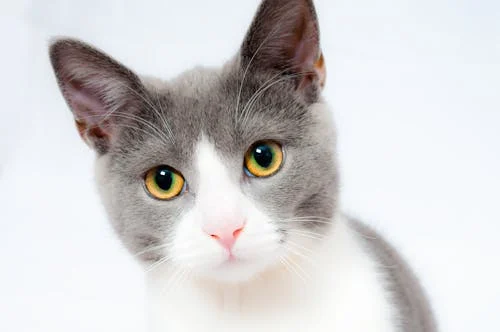

In [410]:
# pip install pillow
from PIL import Image

image = Image.open("cat.png")

image

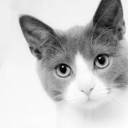

In [411]:
n = min(image.width, image.height)
m = max(image.width, image.height)
x1, y1 = 0, 0
x2, y2 = n, n
image_x = image.convert("L").crop((x1, y1, x2, y2)).resize((128, 128))
image_x

In [412]:
x = numpy.array(image_x).flatten() / 255
x

array([0.92941176, 0.92941176, 0.92941176, ..., 0.98823529, 0.98823529,
       0.98823529])

In [413]:
x.shape

(16384,)

In [414]:
Image.fromarray((x.reshape((128, 128)) * 255)) # imshow

<PIL.Image.Image image mode=F size=128x128>

In [415]:
def image_to_vector(image, size=128):
    n = min(image.width, image.height)
    x1, y1 = 0, 0
    x2, y2 = n, n
    image_x = image.convert("L").crop((x1, y1, x2, y2)).resize((size, size))
    x = numpy.array(image_x).flatten() / 255
    return x

In [416]:
x = image_to_vector(image)
x

array([0.92941176, 0.92941176, 0.92941176, ..., 0.98823529, 0.98823529,
       0.98823529])

In [417]:
def vector_to_image(x, size=128):
    image_x = Image.fromarray((x.reshape((size, size)) * 255))
    return image_x

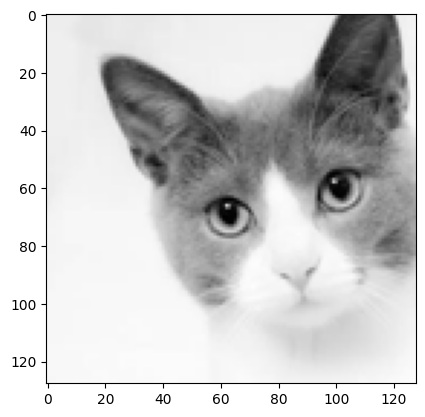

In [418]:
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import imshow

imshow(vector_to_image(x))

In [419]:
x[100:200] = numpy.random.random(100)

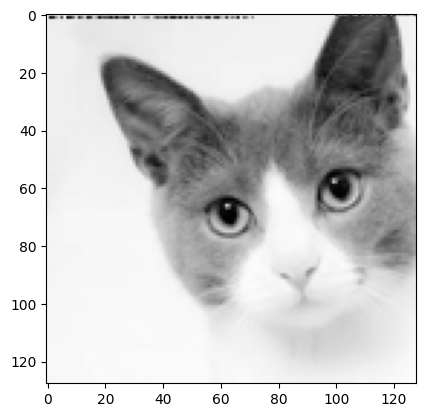

In [420]:
imshow(vector_to_image(x))

> **Paso 1**: Encoder (pasar de `x` a `z`)

La imagen representada como un vector `x` de características

In [421]:
x = image_to_vector(image)
x

array([0.92941176, 0.92941176, 0.92941176, ..., 0.98823529, 0.98823529,
       0.98823529])

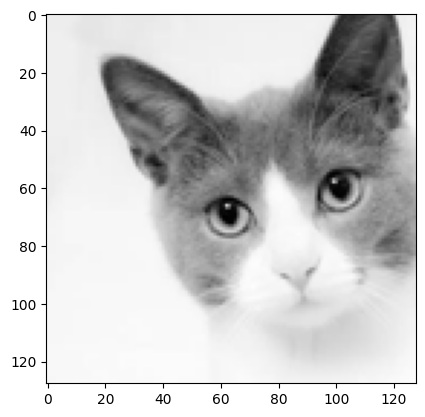

In [422]:
imshow(vector_to_image(x))

> **Paso 2**: Una capa oculta tipo ReLU llamada `h`

In [423]:
W1 = 0.001 * numpy.random.random((x.size, 10))
b1 = numpy.random.random()

h = ReLU(Linear(x, W1, b1)) # x:16384, W1:16384x10, b1:1

h

array([7.09905872, 7.1051295 , 7.09617674, 7.16148392, 7.0835511 ,
       7.12776418, 7.17221865, 7.15276842, 7.11893921, 7.14069237])

In [424]:
dim_latente = 2

W_mu = numpy.random.random((10, dim_latente))
b_mu = numpy.random.random()
W_log_var = numpy.random.random((10, dim_latente))
b_log_var = numpy.random.random()

mu = ReLU(Linear(h, W_mu, b_mu)) # 10x2
log_var = ReLU(Linear(h, W_log_var, b_log_var)) # 10x2

mu, log_var

(array([25.37974409, 27.15017925]), array([36.62559944, 35.48703987]))

> **Paso 3**: Reparametrización (generar `z`)

In [425]:
sigma = numpy.maximum(numpy.exp(0.5 * log_var), 10e3)
epsilon = numpy.random.normal(0, 1, dim_latente)

z = mu + sigma.dot(epsilon)

z

array([-55225680.54026785, -55225678.76983271])

> **Paso 4**: Decoder (pasa de `z` a `x`)

In [426]:
W2 = numpy.random.random((dim_latente, 10))
b2 = numpy.random.random()

h_dec = ReLU(Linear(z, W2, b2))

In [427]:
W3 = numpy.random.random((10, x.size))
b3 = numpy.random.random()

x_recon = Sigmoid(Linear(h_dec, W3, b3))

x_recon

array([0.60337131, 0.60337131, 0.60337131, ..., 0.60337131, 0.60337131,
       0.60337131])

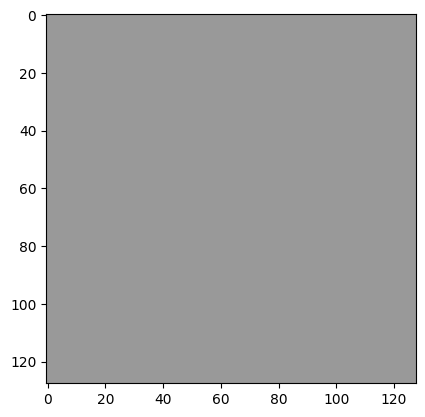

In [428]:
imshow(vector_to_image(x_recon))

$$
y, \hat{y}
$$

MSE

$$
\frac{1}{n} \sum (y - \hat{y})^2
$$

BCE

$$
-\sum y \cdot log(\hat{y}) + (1 - y) \cdot log(1 - \hat{y}) 
$$

In [429]:
-(0.3 * numpy.log(0.4) + (1 - 0.3) * numpy.log(1 - 0.3))

0.5245596803193592

In [430]:
recon_loss = -(x.dot(numpy.log(x_recon)) + (1 - x).dot(numpy.log(1 - x_recon))).sum()

recon_loss

9929.031841014685

VAE - KL (Divergencia entre las normales N(mu, sigma^2) -> N(0, 1))

In [431]:
kl_loss = -0.5 * (1 + log_var - mu ** 2 - numpy.exp(log_var)).sum()

kl_loss

5320246950746026.0

$$
\frac{\partial L}{\partial x_{recon}} \; x_{recon} - x
$$



In [ ]:
dW3 = h_dec.T.dot(x_recon - x) # W3
db3 = (x_recon - x).sum(axis=0) # b3

dW3, db3